# 📘 Optimization 优化器基础简介

在深度学习中，优化器（Optimizer）是**训练过程中用于更新模型参数的算法**，其目标是最小化损失函数 $L(\theta)$，使模型在训练集上拟合得更好，同时具备泛化能力。

---

## 🧠 优化的核心思想

优化器主要通过**梯度信息**来更新模型参数：

$$
\theta \leftarrow \theta - \eta \cdot \nabla_\theta L(\theta)
$$

- $\theta$：模型参数
- $\eta$：学习率（learning rate）
- $\nabla_\theta L(\theta)$：当前参数处的梯度

---

## 📌 优化器 ≠ 损失函数

| 概念        | 解释                             | 示例                             |
|-------------|----------------------------------|----------------------------------|
| 损失函数     | 衡量模型当前预测与真实值的误差       | MSE, Cross-Entropy               |
| 优化器       | 用于调整模型参数以最小化损失         | SGD, Adam, RMSProp              |

---

## 🔄 梯度下降的基本过程

1. **前向传播**：计算预测值 $\hat{y}$
2. **计算损失**：通过 loss function 得到 $L(\theta)$
3. **反向传播**：计算 $\nabla_\theta L(\theta)$
4. **参数更新**：使用优化器对 $\theta$ 进行更新

这个过程在每个 batch 中不断重复，直到模型收敛或达到最大迭代次数。

---

## 🔧 为什么需要多种优化方法？

不同的优化器在以下方面表现不同：

| 维度               | 表现差异                            |
|--------------------|-------------------------------------|
| 收敛速度           | 有些方法快（如 Adam），有些慢但稳定（如 SGD） |
| 易震荡性/稳定性     | Momentum 可以平滑震荡                 |
| 自适应学习率能力     | 如 AdaGrad、RMSProp、Adam             |
| 超参数敏感度       | 有些方法对学习率敏感，有些较稳健         |

---
## 🎯 面试常问问题简答

1. **优化器的作用是什么？**  
   用来根据损失函数的梯度调整模型参数，使模型不断逼近最优解。

2. **优化器和损失函数的关系？**  
   损失函数定义“优化目标”，优化器定义“如何走向最优”。

3. **为什么不用 Grid Search 找最优参数？**  
   因为深度学习的参数维度非常高，无法穷举搜索，只能用优化器逼近。

4. **梯度下降的基本更新公式？**  
   $\theta \leftarrow \theta - \eta \cdot \nabla_\theta L(\theta)$

5. **什么是学习率？为什么它这么重要？**  
   控制步长大小，太大会震荡发散，太小会收敛慢甚至卡住。


# 📦 1. 梯度下降及其变体（GD / SGD / Mini-batch / Momentum / NAG）

梯度下降家族是深度学习优化器的核心起点，所有现代优化器几乎都是从它们发展而来。本模块介绍五种关键算法，从最基本的批量梯度下降（GD）到动量加速方法（Momentum / NAG）。

---

## 1️⃣ Gradient Descent（全量梯度下降）

### 🧭 介绍
最基础的优化方法，每次使用全部训练数据计算损失函数的梯度并更新模型参数，适合小规模数据或教学场景。

### 📐 参数与公式定义
- 学习率（$\eta$）：控制步长
- 更新公式：
  $$
  \theta \leftarrow \theta - \eta \cdot \nabla_\theta L(\theta)
  $$

### 🧠 特性
- 使用所有数据计算梯度
- 收敛路径稳定
- 每次迭代代价高

### ⚖️ 优缺点

| ✅ 优点         | ⚠️ 缺点                     |
|----------------|-----------------------------|
| 理论分析成熟，更新稳定 | 每步需遍历整个数据集，计算成本高    |
| 在凸函数下有全局收敛保证 | 扩展性差，训练数据大时不现实         |

### 🔧 常用于
- 教学示例、凸优化理论分析
- 小数据集、批处理任务（如线性回归）

---

## 2️⃣ Stochastic Gradient Descent（SGD）

### 🧭 介绍
每次迭代只用一个样本计算梯度，更新频率高但方向不稳定，震荡大。

### 📐 参数与公式定义
- 学习率（$\eta$）
- 更新公式：
  $$
  \theta \leftarrow \theta - \eta \cdot \nabla_\theta L(\theta_i)
  $$

### 🧠 特性
- 每步更新基于单一样本
- 易出现震荡但能跳出局部极小

### ⚖️ 优缺点

| ✅ 优点                   | ⚠️ 缺点                         |
|--------------------------|----------------------------------|
| 计算便宜，更新频繁         | 方向不稳定，收敛路径跳跃             |
| 可跳出局部极小值            | 最终解不精确，需配合衰减/调度策略使用    |

### 🔧 常用于
- 大规模数据在线学习
- 推荐系统 / 嵌入学习等场景

---

## 3️⃣ Mini-batch SGD（小批量）

### 🧭 介绍
实际训练中最常用，每次更新使用固定数量样本（如 32、64），兼顾稳定性与效率。

### 📐 参数与公式定义
- 学习率 $\eta$
- 批大小 $B$
- 更新公式：
  $$
  \theta \leftarrow \theta - \eta \cdot \frac{1}{B} \sum_{i=1}^B \nabla_\theta L(\theta_i)
  $$

### 🧠 特性
- 介于全量和单样本之间
- 可用于 GPU 并行计算

### ⚖️ 优缺点

| ✅ 优点              | ⚠️ 缺点                   |
|---------------------|----------------------------|
| 效率高，稳定性强       | 表现依赖 batch size 设置     |
| 适配深度学习并行计算    | 小 batch 易震荡，大 batch 易陷局部 |

### 🔧 常用于
- 几乎所有深度学习训练（CNN / RNN / Transformer）
- 与动量、调度器等方法组合使用

---

## 4️⃣ Momentum（动量法）

### 🧭 介绍
在 SGD 的基础上引入“惯性”思想，模拟小球滚动，减少震荡并加快收敛。

### 📐 参数与公式定义
- 学习率 $\eta$，动量系数 $\gamma$
- 更新公式：
  $$
  v_t = \gamma v_{t-1} + \eta \cdot \nabla_\theta L(\theta) \\
  \theta \leftarrow \theta - v_t
  $$

### 🧠 特性
- 使用历史梯度累积信息
- 有助于摆脱“锯齿”震荡区域

### ⚖️ 优缺点

| ✅ 优点                  | ⚠️ 缺点                       |
|-------------------------|-------------------------------|
| 加速收敛、减少振荡         | 需额外设置 $\gamma$，参数调节敏感 |
| 适合鞍点(saddle point)区域跳跃优化       | 初期动量累积需 warmup             |

### 🔧 常用于
- 图像分类、目标检测等深度网络优化
- 搭配 SGD 在深度 CNN 中使用效果好

---

## 5️⃣ NAG（Nesterov Accelerated Gradient）

### 🧭 介绍
Momentum 的改进版本，在“未来位置”提前计算梯度，提升方向预测能力。

### 📐 参数与公式定义
- 学习率 $\eta$，动量 $\gamma$
- 更新公式：
  $$
  v_t = \gamma v_{t-1} + \eta \cdot \nabla_\theta L(\theta - \gamma v_{t-1}) \\
  \theta \leftarrow \theta - v_t
  $$

### 🧠 特性
- 提前估计梯度，避免过冲
- 更敏感地调整方向，提升收敛速度

### ⚖️ 优缺点

| ✅ 优点                     | ⚠️ 缺点                       |
|----------------------------|-------------------------------|
| 更快更稳地收敛               | 计算复杂度略高                   |
| 在 Momentum 震荡场景下更优秀   | 同样依赖调参（$\eta$, $\gamma$） |

### 🔧 常用于
- 深度 CNN 网络
- 目标检测与语义分割等任务中替代 Momentum

---

## 🎯 总结对比表

| 方法        | 更新单位     | 稳定性     | 收敛速度 | 能否跳出局部最小 | 是否支持并行 |
|-------------|--------------|------------|----------|------------------|--------------|
| GD          | 全量         | ✅ 稳定     | ❌ 慢     | ❌ 弱             | ❌ 否         |
| SGD         | 单样本       | ❌ 抖动     | ✅ 快     | ✅ 可             | ✅ 是         |
| Mini-batch  | 小批量       | ✅ 折中     | ✅ 平衡   | ✅ 可             | ✅ 是         |
| Momentum    | 小批量 + 惯性 | ✅ 更稳     | ✅ 更快   | ✅ 强             | ✅ 是         |
| NAG         | 预判 + 动量   | ✅ 最稳     | ✅ 最快   | ✅ 强             | ✅ 是         |


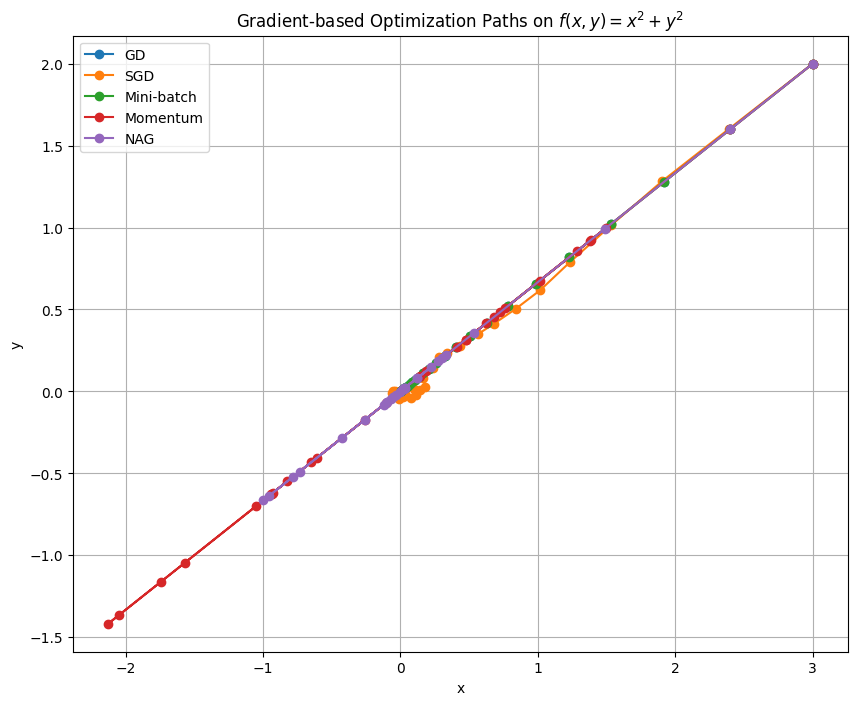

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 目标函数：简单的二次函数 f(x, y) = x^2 + y^2
def f(x, y): return x**2 + y**2
def grad(x, y): return np.array([2*x, 2*y])

# 初始化
x0 = np.array([3.0, 2.0])
eta = 0.1
gamma = 0.9
n_iter = 30

def run_optimizer(method):
    x = x0.copy()
    traj = [x.copy()]
    v = np.zeros_like(x)

    for _ in range(n_iter):
        if method == 'GD':
            g = grad(x[0], x[1])
        elif method == 'SGD':
            g = grad(x[0] + np.random.randn()*0.1, x[1] + np.random.randn()*0.1)
        elif method == 'Momentum':
            g = grad(x[0], x[1])
            v = gamma * v + eta * g
            x -= v
            traj.append(x.copy())
            continue
        elif method == 'NAG':
            g = grad(x[0] - gamma * v[0], x[1] - gamma * v[1])
            v = gamma * v + eta * g
            x -= v
            traj.append(x.copy())
            continue
        else:  # Mini-batch ≈ GD here (mocked)
            g = grad(x[0], x[1])
        x -= eta * g
        traj.append(x.copy())
    return np.array(traj)

# 可视化不同优化器轨迹
methods = ['GD', 'SGD', 'Mini-batch', 'Momentum', 'NAG']
plt.figure(figsize=(10, 8))

for method in methods:
    traj = run_optimizer(method)
    plt.plot(traj[:, 0], traj[:, 1], marker='o', label=method)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient-based Optimization Paths on $f(x, y) = x^2 + y^2$')
plt.legend()
plt.grid(True)
plt.show()


# ⚙️ Block 2：自适应学习率优化器（AdaGrad / RMSProp / Adam）

---

## 6️⃣ AdaGrad（Adaptive Gradient）

### 🧭 介绍
AdaGrad 是第一个具有自适应学习率的优化算法，它会对每个参数维护一个累计平方梯度和，使得学习率在训练过程中逐步减小。

### 📐 参数与公式定义

- 学习率 $\eta$，小常数 $\epsilon$
- 梯度平方累加器 $G_t$
- 更新公式：
  $$
  G_t = G_{t-1} + \nabla_\theta L(\theta)^2 \\
  \theta \leftarrow \theta - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot \nabla_\theta L(\theta)
  $$

### 🧠 特性
- 参数维度高时自适应性强
- 自动降低对频繁更新特征的学习率
- 对稀疏特征表现优秀

### ⚖️ 优缺点

| ✅ 优点                          | ⚠️ 缺点                              |
|----------------------------------|--------------------------------------|
| 每个参数有独立学习率                | 学习率单调衰减，最终可能过小，停止学习       |
| 无需手动调整步长                   | 不适合长时间训练或非稀疏特征              |

### 🔧 常用于
- NLP、推荐系统中的稀疏特征优化
- 文本分类 / 词向量训练（如 GloVe）

---

## 7️⃣ RMSProp（Root Mean Square Propagation）

### 🧭 介绍
为了解决 AdaGrad 学习率“过快衰减”的问题，RMSProp 使用指数衰减平均的方式平滑梯度平方的历史值。

### 📐 参数与公式定义

- 学习率 $\eta$，衰减率 $\gamma$，小常数 $\epsilon$
- 更新公式：
  $$
  E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) \cdot \nabla_\theta L(\theta)^2 \\
  \theta \leftarrow \theta - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \cdot \nabla_\theta L(\theta)
  $$

### 🧠 特性
- 保留 AdaGrad 自适应性
- 控制学习率不至于迅速衰减
- 适合非凸目标函数与深度网络

### ⚖️ 优缺点

| ✅ 优点                          | ⚠️ 缺点                         |
|----------------------------------|---------------------------------|
| 适用于非平稳目标和复杂任务         | 仍需调节 $\gamma$, $\eta$ 等超参数 |
| 在 CNN/RNN 中表现优异              | 理论收敛性不如 SGD             |

### 🔧 常用于
- RNN、LSTM 训练
- 小批量不稳定训练任务，如强化学习中 Q-learning

---

## 8️⃣ Adam（Adaptive Moment Estimation）

### 🧭 介绍
Adam 结合了 Momentum 和 RMSProp 的优点，既考虑梯度的动量（方向）又考虑历史梯度平方（自适应学习率），是目前最常用的深度学习优化器之一。

### 📐 参数与公式定义

- 学习率 $\eta$，一阶动量衰减 $\beta_1$，二阶动量衰减 $\beta_2$，$\epsilon$
- 更新公式：
  $$
  m_t = \beta_1 m_{t-1} + (1 - \beta_1) \cdot \nabla_\theta L(\theta) \\
  v_t = \beta_2 v_{t-1} + (1 - \beta_2) \cdot \nabla_\theta L(\theta)^2 \\
  \hat{m}_t = \frac{m_t}{1 - \beta_1^t},\quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \\
  \theta \leftarrow \theta - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
  $$

### 🧠 特性
- 同时使用一阶和二阶动量
- 包含偏差修正（warm start）
- 自适应调节每个参数的更新率

### ⚖️ 优缺点

| ✅ 优点                           | ⚠️ 缺点                                |
|-----------------------------------|----------------------------------------|
| 收敛快、鲁棒性强、参数更新平滑        | 收敛点可能不如 SGD 稳定（泛化差）         |
| 对初始学习率不敏感                 | 有理论研究指出可能不收敛（已被 AMSGrad 修复） |

### 🔧 常用于
- 默认用于大多数深度学习框架（PyTorch, TensorFlow）
- 图像、文本、音频等任务中的标准优化器


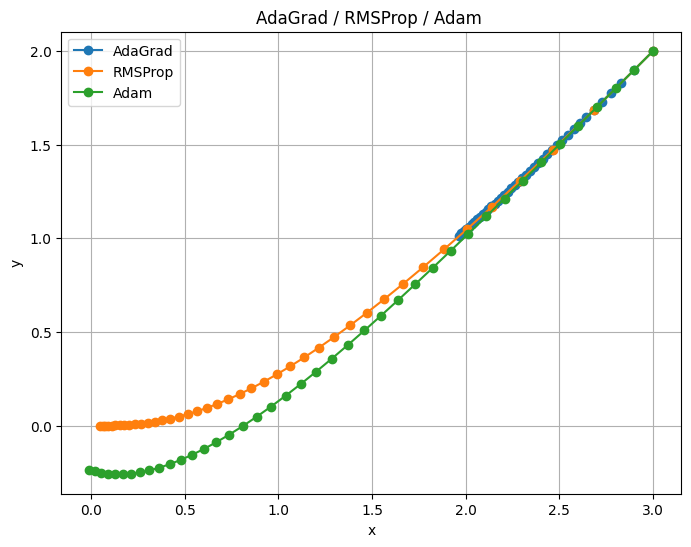

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 目标函数与梯度
def f(x, y): return x**2 + y**2
def grad(x, y): return np.array([2 * x, 2 * y])

# 通用设置
x0 = np.array([3.0, 2.0])
eta = 0.1
eps = 1e-8
n_iter = 40

def run_adagrad():
    x = x0.copy()
    traj = [x.copy()]
    G = np.zeros_like(x)
    for _ in range(n_iter):
        g = grad(*x)
        G += g ** 2
        x -= eta * g / (np.sqrt(G) + eps)
        traj.append(x.copy())
    return np.array(traj)

def run_rmsprop(gamma=0.9):
    x = x0.copy()
    traj = [x.copy()]
    Eg = np.zeros_like(x)
    for _ in range(n_iter):
        g = grad(*x)
        Eg = gamma * Eg + (1 - gamma) * g ** 2
        x -= eta * g / (np.sqrt(Eg) + eps)
        traj.append(x.copy())
    return np.array(traj)

def run_adam(beta1=0.9, beta2=0.999):
    x = x0.copy()
    traj = [x.copy()]
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for t in range(1, n_iter + 1):
        g = grad(*x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g ** 2
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        x -= eta * m_hat / (np.sqrt(v_hat) + eps)
        traj.append(x.copy())
    return np.array(traj)

# 运行优化器
trajectories = {
    'AdaGrad': run_adagrad(),
    'RMSProp': run_rmsprop(),
    'Adam': run_adam()
}

# 可视化轨迹
plt.figure(figsize=(8, 6))
for name, traj in trajectories.items():
    plt.plot(traj[:, 0], traj[:, 1], marker='o', label=name)

plt.xlabel('x')
plt.ylabel('y')
plt.title('AdaGrad / RMSProp / Adam ')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()
